# **CI Course - EX7**

--------

--------


## Theory Overview ##

### Classification ###

What is the **classification** task in ML?

In machine learning, classification is a type of task where the goal is to predict the class or category of a given set of data points based on their features or attributes.</br> The data points are typically represented as a set of numerical or categorical features, and the goal is to learn a function that can map these features to the correct class labels.

For example, in an image classification task, the input data would be a set of images, and the goal is to predict the correct category or class for each image (such as "dog", "cat", "car", etc.)


### Popular Basic Classifiers ### 

#### Linear / Logistic Regression: ####

![linear-regression-vs-logistic-regression.png](assets/linear-regression-vs-logistic-regression.png)

**Linear**:

$$ \hat{y} = \sigma = {W^T}x +b $$
(As we saw last exercise)

And classes will be determined for example by:

$$ \hat{y} < 0.5 \rightarrow Class A$$

$$ \hat{y} >= 0.5 \rightarrow Class B$$

NOTE: we can get values above 1 or below 0. No statistical meaning.

**Logistic**:


$$ \sigma = {W^T}x +b $$
$$ \hat{y} = f(\sigma) = \frac{1} {1 + e^{-\sigma}} $$

Where function **f** is the sigmoid activation.</br>
The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.


#### Naive-Bayes classifier: ####

Using Naive-Bayes classifier, we can find the probability of $y$ (the class label) happening, given that $X$ (the input) has occurred.

Bayes theorem formula in our case:

\begin{equation}
P(y | X) = \frac{P(X|y)P(y)}{P(X)}
\end{equation}

The variable $y$ is the class label. Variable $X$ represent the parameters/features.

With the naive assumption:
\begin{equation}
P(X | y) = \Pi_{i=1}^{n} P(x_i | y)
\end{equation}
Let: $X = {(x_1, x_2, ..., x_n)}$ <br/> A set of n features, and let $y$ be a class label. **Now** we can substitute for $X$ in The Naive Bayes classifier to computes the probability of a class label $y$ given the values of the features $x_1, x_2, ..., x_n$ using the equation:

\begin{equation}
P(y | x_1, x_2, ..., x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i | y)}{P(x_1, x_2, ..., x_n)}
\end{equation}

where $P(y | x1, x2, ..., xn)$ is the posterior probability of the class $y$ given the feature values $x_1, x_2, ..., x_n, P(y)$ is the prior probability of the class $y, P(x_i | y)$ is the conditional probability of the feature $x_i$ given the class $y$, and $P(x_1, x_2, ..., x_n)$ is the marginal probability of the feature values.

In practice, the denominator $P(x_1, x_2, ..., x_n)$ is often ignored because it is a constant for all possible class labels, and the classifier only needs to compare the relative probabilities of each class given the feature values. Therefore, the Naive Bayes classifier can be simplified to:

The posterior is proportional to the likelihood times the prior.

\begin{equation}
P(y | x_1, x_2, ..., x_n) \propto P(y) \prod_{i=1}^{n} P(x_i | y)
\end{equation}

So finally we can take the **predicted label** using the formula:

\begin{equation}
\hat{y} = argmax_y P(y) \prod_{i=1}^{n} P(x_i | y)
\end{equation}


The equation for $P(x_i | y)$ based on the **Gaussian naive-bayes** is as follow:
\begin{equation}
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2_{y,i}}},e^{-\frac{(x_i-\mu_{y,i})^2}{2\sigma^2_{y,i}}}
\end{equation}

where $\mu_{y,i}$ and $\sigma^2_{y,i}$ are the mean and variance of the $i$th feature for the class y.

For summary, in other words, for each feature, the Gaussian Naive Bayes classifier assumes that the likelihood of the feature given the class label follows a normal distribution with a specific mean and variance for that class.<br/>The classifier computes the probability of each feature given the class label using the normal distribution probability density function, and then combines these probabilities using Bayes' theorem to obtain the probability of the class given the feature values.

#### Support Vector Machine (SVM) classifiers: ####

SVM works by finding the best boundary **(hyperplane) that separates the classes** with the **maximum margin**.<br/>SVM classifiers can be linear or non-linear, depending on the type of hyperplane used for classification.<br/>In a **linear SVM**, a linear hyperplane is used to separate the classes**, while in a non-linear SVM, a non-linear decision boundary is used.

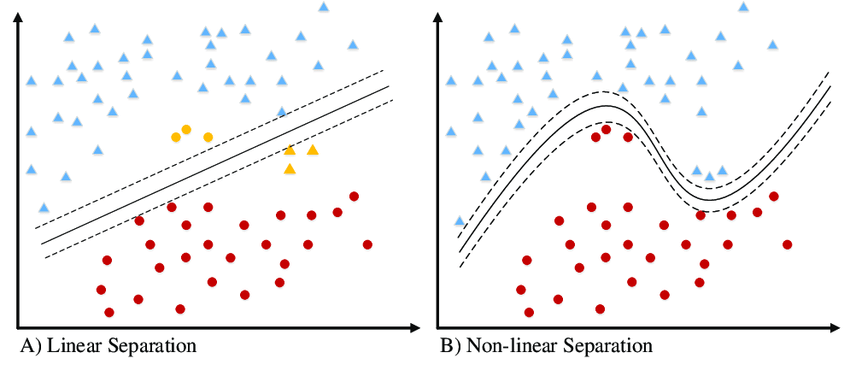


SVM classifiers are trained by first selecting the **kernel function**.<br/>
A kernel is a function that maps the input features to a higher-dimensional space, where it becomes easier to find a linear hyperplane that can separate the classes.


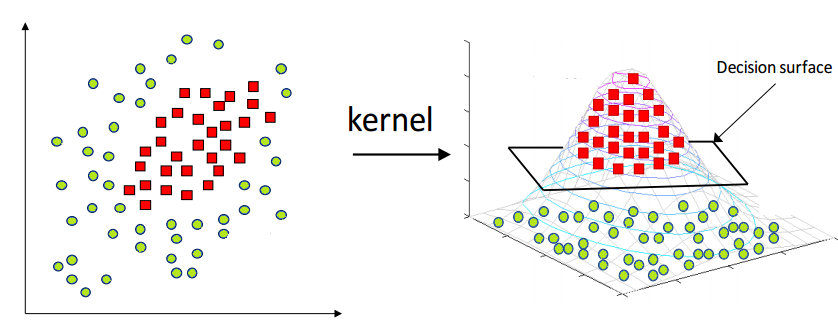

Then optimizing the hyperparameters to find the best decision boundary that separates the classes.<br/>The optimization process involves finding the values of the hyperparameters that **maximize the margin between the classes**.<br/>This is achieved through the use of an optimization algorithm, such as gradient descent.<br/>Once the optimal hyperparameters are found, the SVM model can be used to classify new instances based on their feature values. 

#### K-Nearset Neighbors (KNN) classifier: ####

The kNN classifier assigns a class label to a new data point based on the class labels of its k-nearest neighbors in the training data.

The kNN classifier does not involve a traditional training process. Instead, the algorithm searches through the training data to find the k-nearest neighbors to the new data point based on a **distance metric**, and **assigns the class label that is most common among those k-nearest neighbors to the new data point**.

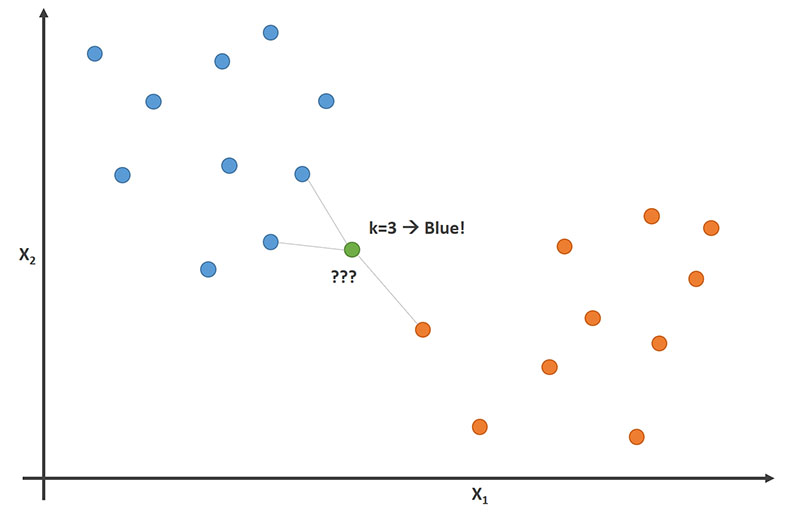

---


### Exercise - Digits classification ###

In this exercise we will be performing a digit classification task , and we'll compare various types of classifiers. To accomplish this, we will use pre-built functions in the sklearn library to load the dataset of digits. 

Dataset properties:
- Each datapoint is a 8x8 image of a digit
- Classes : 10 (0-9 digits) 
- Samples per class : ~ 180
- Samples total : 1797
- Features : integers 0-15 (= 16 possible values of single pixel)


For more information see : [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

---

### Solution ###

Solution flow:
1. Examine the data
2. Pre-processed the data for better learning of the model  
3. Split the dataset to train/test sets
4. Define the classifiers and their parameters
5. Compare the classifiers and their results

#### Import libraries and examine the data ####

Data shape: (1797, 8, 8)
Example of first 10 digit images:


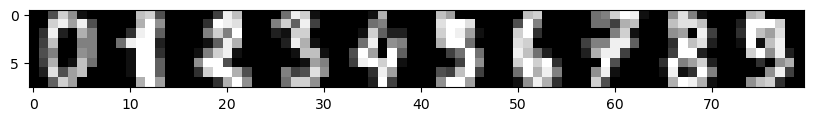

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB  

###### Load and examine data ######
data = load_digits()
print(f"Data shape: {data.images.shape}")
print("Example of first 10 digit images:")
# Show example of 10 images from the dataset
plt.figure(figsize=(10,5))
plt.gray()
I = data.images[0]
for i in range(1,10):
    I = np.concatenate((I, data.images[i]), axis = 1)
plt.imshow(I)
plt.show()


In [14]:
# Example of the digit '0' raw matrice
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Pre-process ####

##### Input flattening #####
If our input data is in a data structure with more than one dimension (such as in the case of 2D images), we must flatten the data to create a vector with a one-dimensional shape. 

For example:

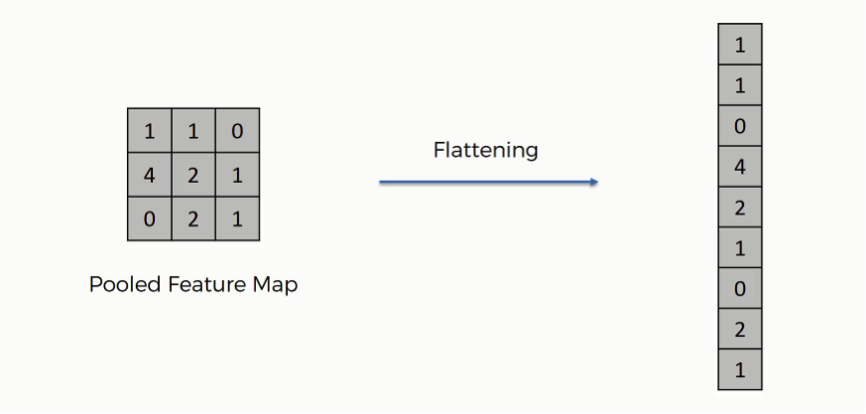

Now we can insert the flattened data into the classifiers! 

In [10]:
# Flatten the 8x8 image to a vector of length 64
X, y = [], np.array(data.target)
for x in data.images:
    x = x.reshape((-1,))
    X.append(x)
X = np.array(X)

# Example of the digit '0' flattened
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


##### Data Normalization #####

Why is it good to normalize the data in pre-processing stage? 

Normalizing data in the pre-processing stage is important for improving the performance and efficiency of machine learning models:

1. Normalizing data helps with convergence by making it easier for optimization algorithms to find the optimal solution.
2. Normalizing data reduces the impact of outliers, making them less significant.
3. Normalizing data ensures that all features are on the same scale, which makes it easier to compare the importance of different features in the model.

Two methods of normalization for example:
1. **Standardization based on -  mean and std:**
$$ x_{normalized} = {{(x - \mu)} \over {\sigma}} $$
Where $\mu$ is the mean and $\sigma$ is the standard deviation
2. **Normalize based on - min and max:**
$$ x_{std} = {{(x - x_{min})} \over {x_{max} - x_{min}}} $$
$$ x_{normalized} = x_{std} * (x_{max} - x_{min}) + x_{min} $$

In [18]:
# Two options to normalize data
if 1:
    # Standardization with mean and std
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X) # X = X*x_std + x_mean # Denormalize or use scaler.inverse_transform(X)
    # Example of the digit '0' normalized
    print("Standard scaler!")
    print(X[0])
    
else:
    # Normalize with min and max
    scaler = MinMaxScaler().fit(X)
    X = scaler.transform(X)
    # Example of the digit '0' normalized
    print("Minmax scaler scaler!")
    print(X[0])

Standard scaler!
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]


#### Split train/test sets ####

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"X_train shape is {X_train.shape} | y_train shape is {y_train.shape} ")
print(f"X_test shape is {X_test.shape} | y_test shape is {y_test.shape} ")

X_train shape is (1527, 64) | y_train shape is (1527,) 
X_test shape is (270, 64) | y_test shape is (270,) 


#### Define classifiers and parameters ####

In [21]:
names = ['Nearest Neighbors', 
         'Linear SVM', 
         'RBF SVM', 
         'Gaussian Naive-Bayes', 
         'Logistic Regression', 
         'Linear Regression']

# Define the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=.2, C=1, probability = True), # RBF is the default
    GaussianNB(),
    LogisticRegression(solver='liblinear', random_state=0),
    LinearRegression()]

#### Compare classifiers and results ####


-------   Training!!      ------
Nearest Neighbors 0.9666666666666667
Linear SVM 0.9814814814814815
RBF SVM 0.8296296296296296
Gaussian Naive-Bayes 0.7777777777777778
Logistic Regression 0.9592592592592593
Linear Regression 0.5717479148126865
-------------------------
-------   Testing!!      ------
input image:


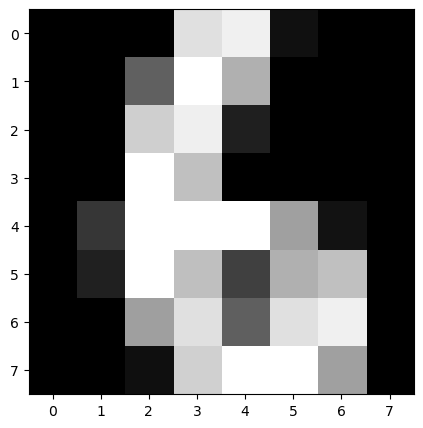

-------------------------
** Classifier Nearest Neighbors: 
Real class: 6, predicted class: 6
Distribution: 
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 1.0
7 0.0
8 0.0
9 0.0
-------------------------
** Classifier Linear SVM: 
Real class: 6, predicted class: 6
Distribution: 
0 0.001
1 0.0
2 0.001
3 0.001
4 0.0
5 0.001
6 0.994
7 0.0
8 0.001
9 0.0
-------------------------
** Classifier RBF SVM: 
Real class: 6, predicted class: 6
Distribution: 
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 1.0
7 0.0
8 0.0
9 0.0
-------------------------
** Classifier Gaussian Naive-Bayes: 
Real class: 6, predicted class: 6
Distribution: 
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 1.0
7 0.0
8 0.0
9 0.0
-------------------------
** Classifier Logistic Regression: 
Real class: 6, predicted class: 6
Distribution: 
0 0.004
1 0.001
2 0.003
3 0.001
4 0.0
5 0.0
6 0.97
7 0.0
8 0.021
9 0.0
-------------------------
** Classifier Linear Regression: 
Real class: 6, predicted class: 5.091415377325891


In [33]:
# Iterate over classifiers and evaluate score over all test data
C = []
print()
print ("-------   Training!!      ------")
for name, clf in zip(names, classifiers):
    clf.fit(list(X_train), list(y_train))
    
    score = clf.score(X_test, y_test) # Evaluate on test data
    C.append(clf)
    print (name, score)
C = dict( zip( names, C) )
print ("-------------------------")
print ("-------   Testing!!      ------")
print("input image:")
# Iterate over classifiers and predict class for a single image
idx = np.random.randint(len(y_test))
# Plot the input image
x = scaler.inverse_transform(X_test[idx].reshape(1,-1)).reshape(8,8)
plt.figure(figsize=(10,5))
plt.gray()
plt.imshow(x)
plt.show()

for name in C.keys():
    print ("-------------------------")
    print ('** Classifier ' + name + ': ')
    clf = C[name]

    x, y_real = X_test[idx], y_test[idx]

    y_predict = clf.predict(x.reshape(1,-1))[0]

    print ('Real class: ' + str(y_real) + ', predicted class: ' + str(y_predict))
    if name != 'Linear Regression': 
        dist = clf.predict_proba(x.reshape(1,-1))[0] # Get probability vector for each class (not possible for linear regression)
        dist = [np.round(d, 3) for d in dist]
        print ('Distribution: ')
        [print(i, d) for i, d in enumerate(dist)]

---

## Summary ##

In this class we covered:

1. An overview of classification task.
2. We mentioned popular classifiers and their main concept.
3. Finally, we compared those classifiers on a digit classification problem.

---

## Helpful and extra links ##

1. [Logistic Regression explained](youtube.com/watch?v=yIYKR4sgzI8)
2. [Naive Bayes, Clearly Explained!!!](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
3. [Support Vector Machine (SVM) in 2 minutes](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
4. [The Kernel Trick in Support Vector Machine](https://www.youtube.com/watch?v=Q7vT0--5VII)
5. [K-nearest neighbors, Clearly Explained](https://www.youtube.com/watch?v=HVXime0nQeI)

---
